<a href="https://colab.research.google.com/github/DICKY365/Analitika-Data/blob/main/Uas_Forecasting_M_Dicky_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Microsoft Stocks**

Forcasting itu melakukan peramalan menggunakan data yang disebut timesries ,data yang digunakan timesries yaitu data continue atau data yang berkelanjutnya yaitu data yg ada date time, data yang ada waktu hari jam menit dll. Dataset ini memberikan analisis rinci tentang kinerja saham Microsoft Corporation dari 1986 hingga 2023. Data tersebut mencakup parameter seperti harga saham, harga rendah, harga tinggi, dan volume perdagangan, memberikan gambaran menyeluruh tentang perilaku pasar perusahaan sepanjang tahun.

Data tersebut mencakup periode awal kehadiran Microsoft di pasar saham, menangkap fluktuasi dan tren yang terjadi sepanjang perjalanan perusahaan
tersebut. Kumpulan data ini memberikan wawasan tentang penilaian pasar saham Microsoft dari waktu ke waktu, serta mencerminkan tonggak penting dalam sejarah perusahaan.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Dengan menggunakan sintaks di atas, kita dapat mengimpor data yang akan dianalisis, melakukan manipulasi dan analisis data, melakukan operasi angka numerik, membuat visualisasi grafik yang menarik, menggunakan gaya plot yang telah disediakan, menyediakan fungsi matematika, serta melakukan manipulasi dan penguraian waktu dan tanggal dalam berbagai format.

**Import Dataset**



```
# This is formatted as code
```

Dataset source : https://www.kaggle.com/datasets/bilalwaseer/microsoft-stocks-from-1986-to-2023

In [2]:
#  https://drive.google.com/file/d/1RpZfwoMpBUZcXpiewt23mbHZ7qCQKwxG/view?usp=sharing

!gdown 1RpZfwoMpBUZcXpiewt23mbHZ7qCQKwxG

Downloading...
From: https://drive.google.com/uc?id=1RpZfwoMpBUZcXpiewt23mbHZ7qCQKwxG
To: /content/Microsoft Stocks.csv
100% 412k/412k [00:00<00:00, 156MB/s]


Coding di atas digunakan untuk mendowload file csv. dari gdrive

In [3]:
train_data = pd.read_csv('Microsoft Stocks.csv')
train_data.head()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000


Coding ini digunakan untuk membaca atau memunculkan data pada file csv yang sudah di dowload pada gdrive yang bernama 'Microsoft Stocks.csv kode ini pun digunakan untuk memunculkan beberapa data yang ada pada file csv .

Check missing values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB


Coding ini digunakan untuk memberi informasi data yang ada pada dataf frame seperti tipe data, penggunaan memori dan lain lain, biasanya digunakan untuk mencari data yang  mising value. hasil dari pengolahan data di atas tidak ada mising value dan terdapat 3 type data seperti float64(4), int64(1), dan object(1).

Check statistic vales for every features

In [5]:
train_data.describe()

,Price,Open,High,Low,Volume
count,9369.000000,9369.000000,9369.000000,9369.00000,9.369000e+03
mean,48.093331,48.079601,48.599116,47.54945,5.780523e+07
std,70.144460,70.120795,70.849226,69.35664,3.701243e+07
min,0.090000,0.090000,0.090000,0.09000,2.300000e+06
25%,5.370000,5.340000,5.430000,5.25000,3.357000e+07
50%,27.090000,27.050000,27.340000,26.82000,5.109000e+07
75%,43.500000,43.450000,44.000000,42.94000,7.168000e+07
max,343.110000,344.620000,349.670000,342.20000,7.886900e+08


Coding di atas adalah perintah yang digunakan untuk memunculkan ringkasan atau mengecek statistik untuk setiap kolom.

Handle datetime data for time series

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Price,Open,High,Low,Volume
Date,,,,,
2023-05-15,309.46,309.10,309.90,307.59,16290000
2023-05-12,308.97,310.55,310.65,306.60,19770000
2023-05-11,310.11,310.10,311.12,306.26,31680000
2023-05-10,312.31,308.62,313.00,307.67,30080000
2023-05-09,307.00,308.00,310.04,306.31,21340000


Coding di atas adalah  perintah yang digunakan untuk mengubah kolom tahun menjadi tipe data date time dan mengaturnya menjadi index

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

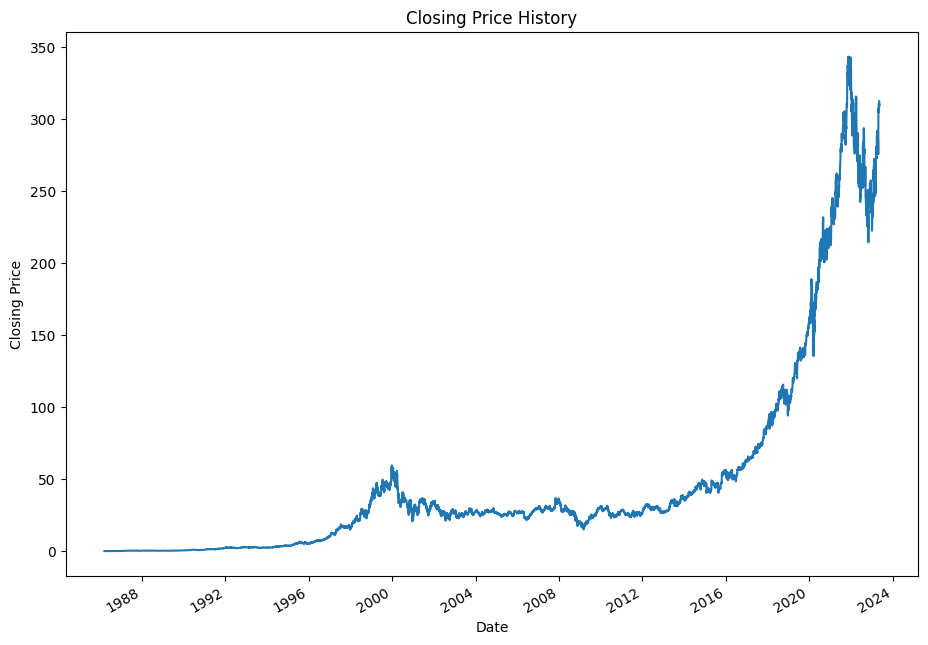

In [7]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Price'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Coding di atas adalah perintah yang digunakan untuk membuat plot garis dari data "Closing Price History", didapat hasil dari plot garis dari Stock Price adalah stasioner

<Figure size 1600x800 with 0 Axes>

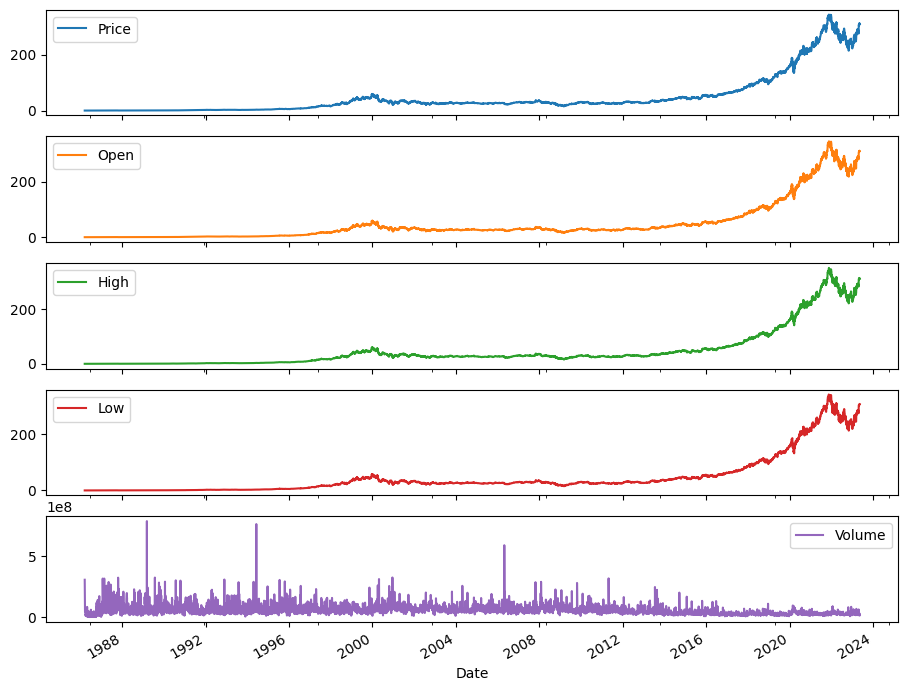

In [8]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Price', 'Open', 'High' , 'Low', 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Codingan ditas adalah perintah yang digunakan untuk membuat plot plot terpisah dari data frame. data yang di munculkan di plot diatas adalah Price, Open, High, Low, dan Volume



In [9]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Price'] - train_data['Open']) / train_data['Open'] * 100.0

Codingan di atas adalah perintah yang digunakan untuk membuat kolom atau fitur baru dimana didalamnya terdiri dari High dan Low, Price dan Open untuk penyebab.

In [10]:
df = train_data[['HL_PCT', 'PCT_change', 'Price','Volume']]

Codingan diatas adalah perintah yang digunakan untuk membuat dataframe baru dimana data frame baru ini digunakan untuk analisis lebih lanjut atau yang lebih presisi untuk meramalkan sebuah data.

In [11]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Price'].shift(-forecast_out)

469


<ipython-input-11-41108f2cdfbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Price'].shift(-forecast_out)


Codingan diatas adalah perintah yang digunakan untuk menentukan jumblah baris yang akan di geser pada kolom Harga Saham, dimana Codingan ini digunakan untuk memulai sebuah peramalan.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Codingan diatas adalah perintah yang diguanakan untuk mengimpor modul untuk membuat model regresi, melakukan penskalaan data, membagi dataset, dan mengevaluasi model menggunakan metrik yang sesuai

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Codingan diatas adalah perintah yang digunakan untuk memastikan data pada skala serupa sehingga dapat membantu untuk kita membuat peramalan.

In [14]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Codingan diatas adalah perintah yang diguanakan untuk membagi menjadi dua bagian data dimana dua bagian itu adalah baris yang akan dilakukan untuk peramalan dan jumlah keseluruhan data kecuali baris terakhir yang nantinya dijadikan pelatihan untuk peramalan.

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Codingan diatas adalah perintah yang digunakan untuk melanjutkan ke tahap pelatihan untuk peramalan dimana nilai kolom data diambil dan disimpan menjadi array

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Codingan diatas adalah perintah yang digunakan untuk membagi aray x dan aray y menjadi set pelatihan dan set pengujian untuk peramalan

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Codingan diatas adalah perintah yang digunakan untuk menghitung nilai regresi linearnya dari set x dan y dan di evaluasi menggunakan set x test dan y test

In [21]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Codingan diatas adalah perintah yang digunakan untuk menghitung koefisisen determinasi menggunakan model random forest dari set x dan y dan di evaluasi menggunakan set x test dan y test

In [22]:
rf_confidence

0.9362446229654469

Codingan diatas adalah perintah yang digunakan untuk memunculkan hasil dari nilai koefisien determinasi yaitu sebesar 0.9362446229654469
[ ]


In [19]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-19-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-19-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-19-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Codingan diatas adalah perintah yang digunakan untuk memprediksi nilai harga pasar saham di masa depan dilakukan menggunakan model Regressor Random Forest (rf) dan hasil prediksi dimasukkan ke dalam kolom "Forecast"

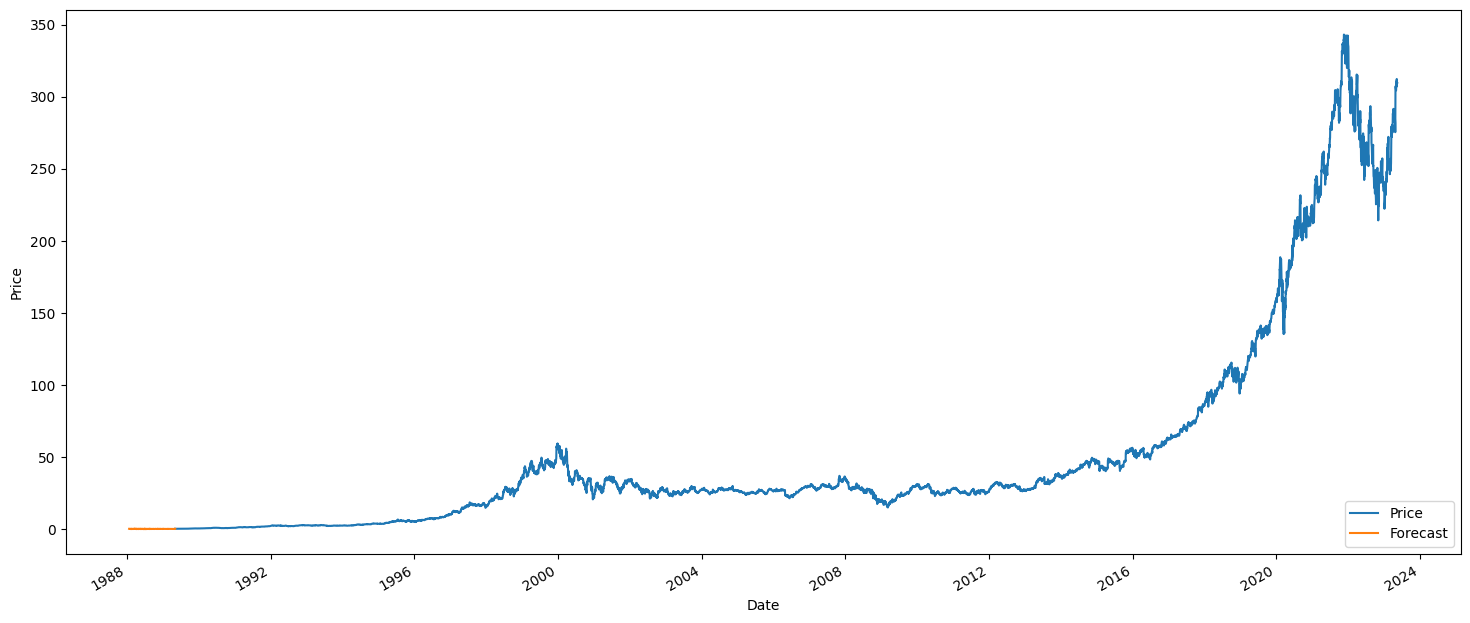

In [20]:
plt.figure(figsize=(18, 8))
df['Price'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Codingan diatas adalah perintah yang digunakan untuk memunculkan data plot garis dimana plot garis ini adalah hasil peramalan dari data saham Microsoft dari waktu ke waktu. didapati hasil prediksi kedepan untuk harga pasar saham Microsoft akan terus naik bertumbuh